In [1]:
# Loading libraries

options(warn = -1) # Turning off the warnings

suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(Matrix))
suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(WGCNA))
suppressPackageStartupMessages(library(hdWGCNA))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(scran))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(corrplot))
suppressPackageStartupMessages(library(gridExtra))

# Setting working directory and the seed

setwd("/home/arsham79/projects/rrg-hsn/arsham79/nsclc/results/wgcna/")

set.seed(42)

ERROR: Error in library(WGCNA): there is no package called ‘WGCNA’


In [2]:
# Files directory 

seurat_object_cell_type_annotated_RDS_direction <- "/home/arsham79/projects/rrg-hsn/arsham79/nsclc/results/pbmc_cell_type_annotated.rds"

In [3]:
# Reading the Seurat object

pbmc <- readRDS(seurat_object_cell_type_annotated_RDS_direction)

In [4]:
# Adding the cell types to the metadata with the right order of barcodes

identical(names(pbmc@active.ident), rownames(pbmc@meta.data)) # checking the right order
cell_type <- as.character(pbmc@active.ident)
pbmc@meta.data <- cbind(pbmc@meta.data, cell_type)

[1] TRUE

In [5]:
# Sub-setting the lung pbmcfrom original pbmc

pbmc_lung <- subset(pbmc, idents =  c("AT type II", "AT type I", "AT type II like cells", "Club cells", "Ciliated cells"))

# Metadata shrinkage

cells_remained <- colnames(GetAssayData(pbmc_lung@assays$integrated))
pbmc_lung@meta.data <- pbmc_lung@meta.data[cells_remained,] 

In [6]:
options(warn = -1) # Turning the warnings on again

# Setting up the WGCNA pipeline

pbmc_lung <- SetupForWGCNA(seurat_obj = pbmc_lung, wgcna_name = "scWGCNA")

In [7]:
# Creating metacell objects for each group of cells with respect to the batch

pbmc_lung <- MetacellsByGroups(seurat_obj = pbmc_lung,
                               group.by = c("cell_type", "ID"),
                               reduction = "pca",
                               k = 25, 
                               max_shared = 10, 
                               ident.group = "cell_type")

# This is the normalization for metacell expression matrix and not the count data

pbmc_lung <- NormalizeMetacells(pbmc_lung)

Normalizing layer: counts



### __AT type II like cells__
#### We decided to start with the most important cell type

In [8]:
# Setting up an expression matrix for only AT type II cells for having a WGCNA only for this cluster

pbmc_lung <- SetDatExpr(pbmc_lung, group_name = "AT type II like cells", group.by= "cell_type", assay = "RNA_test")

  ..Excluding 111 genes from the calculation due to too many missing samples or zero variance.


In [9]:
# Test different soft powers to obtain the sacle free topology thershold

pbmc_lung <- TestSoftPowers(pbmc_lung, networkType = 'signed')
plot_list <- PlotSoftPowers(pbmc_lung)

pickSoftThreshold: will use block size 1889.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 1889 of 1889
   Power SFT.R.sq slope truncated.R.sq mean.k. median.k.  max.k.
1      1   0.1290  8.95          0.926 969.000  9.64e+02 1060.00
2      2   0.0158  1.40          0.808 506.000  4.97e+02  609.00
3      3   0.0604 -1.47          0.694 269.000  2.61e+02  362.00
4      4   0.5330 -2.88          0.851 146.000  1.39e+02  224.00
5      5   0.7470 -2.95          0.937  81.200  7.59e+01  144.00
6      6   0.8290 -2.77          0.958  46.300  4.16e+01   95.90
7      7   0.8180 -2.56          0.922  27.100  2.33e+01   65.60
8      8   0.8350 -2.28          0.918  16.300  1.34e+01   46.10
9      9   0.8000 -2.52          0.943  10.200  8.02e+00   37.40
10    10   0.8500 -2.45          0.983   6.560  4.83e+00   31.60
11    12   0.8820 -2.30          0.956   3.010  1.80e+00   23.80
12    14   0.3630 -3.31          0.318   1.560  7.67e-01   18.90


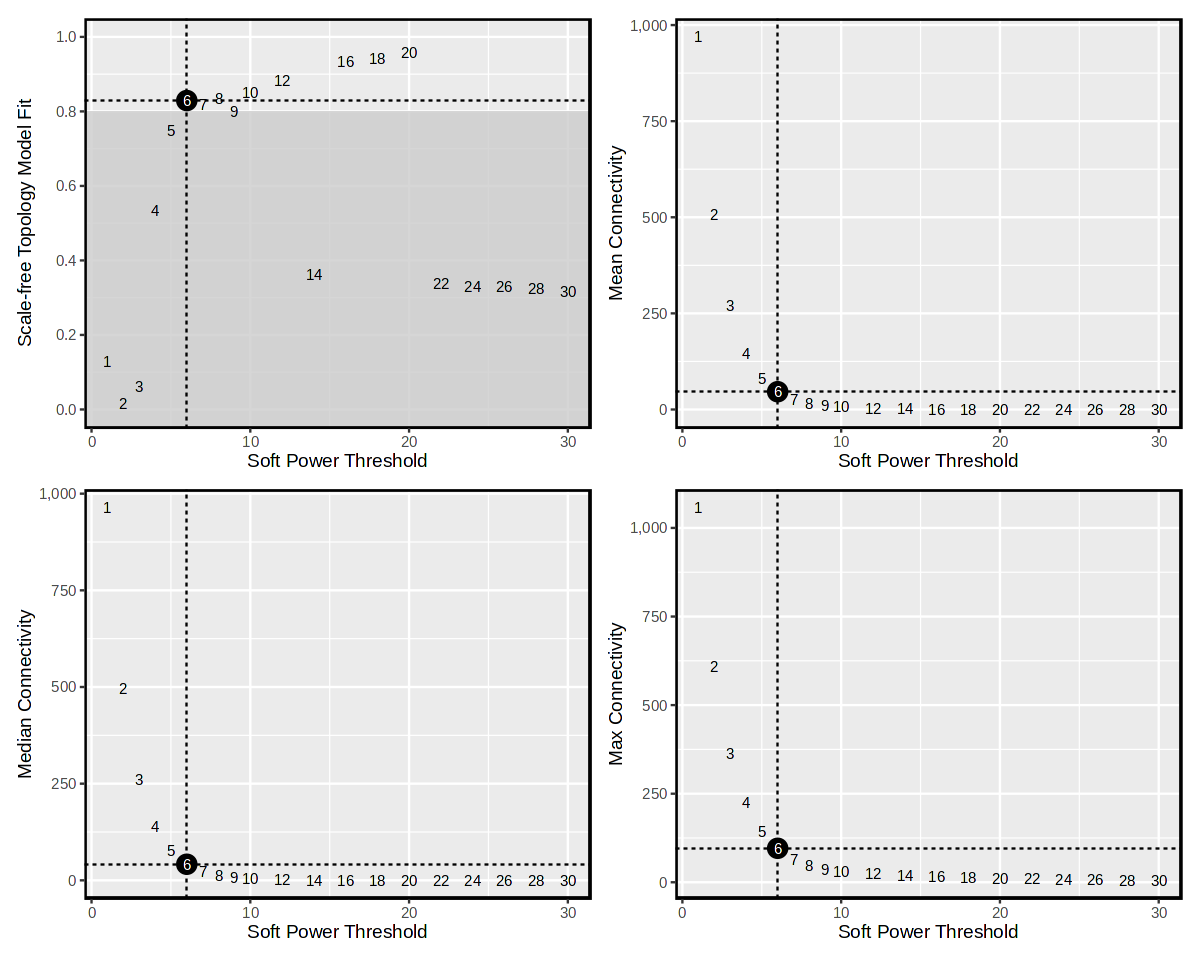

In [10]:
# Using patchworker the plot the results

options(repr.plot.width=10, repr.plot.height=8) # adjusting the plot size

wrap_plots(plot_list, ncol=2)

Soft power not provided. Automatically using the lowest power that meets 0.8 scale-free topology fit. Using soft_power = 6
 Calculating consensus modules and module eigengenes block-wise from all genes
 Calculating topological overlaps block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
 ..Working on block 1 .
 ..Working on block 1 .
 ..merging consensus modules that are too close..


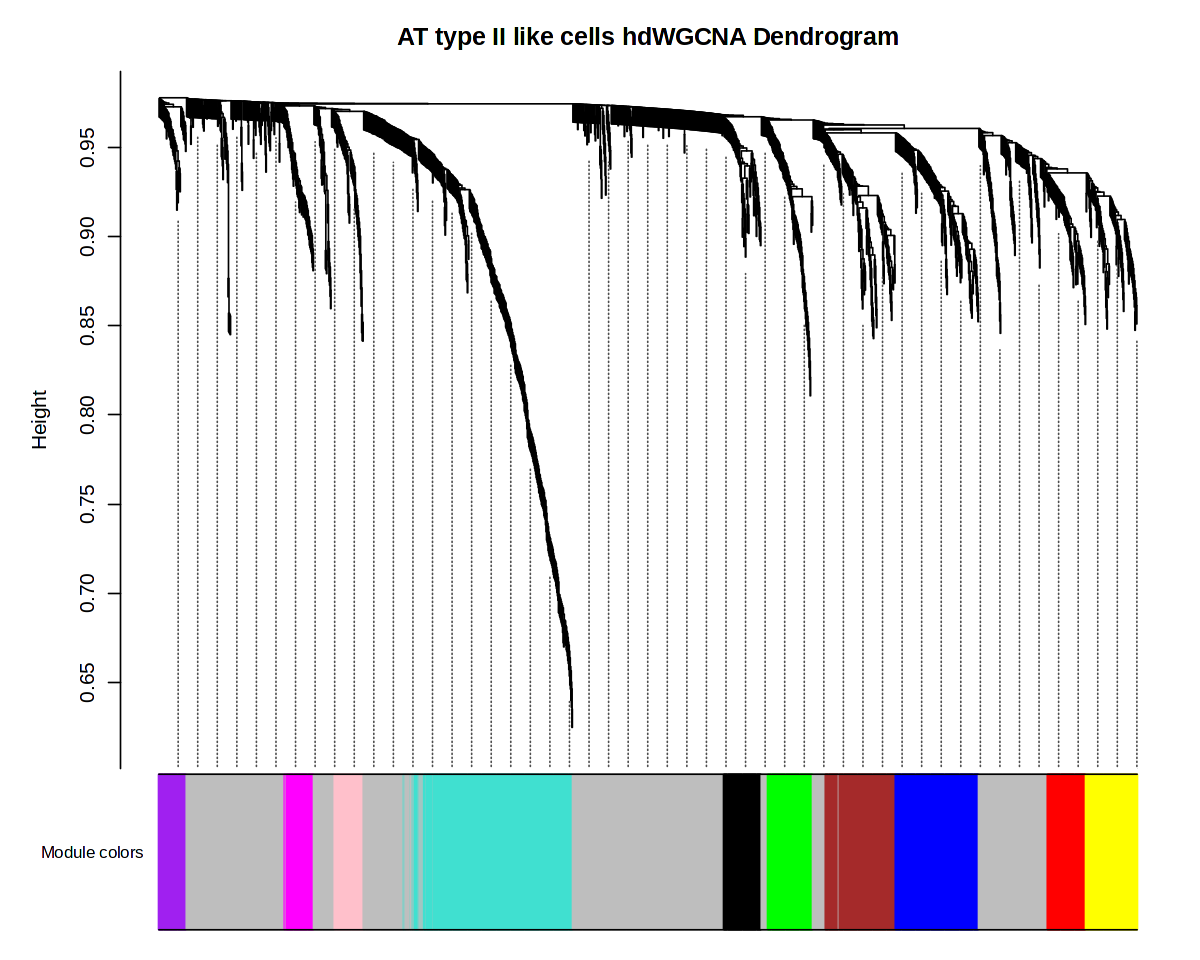

In [11]:
# Creating the dendrogram for AT type II like cells

pbmc_lung <- ConstructNetwork(pbmc_lung, tom_name = "AT type II like cells", overwrite_tom = TRUE)
PlotDendrogram(pbmc_lung, main='AT type II like cells hdWGCNA Dendrogram')

In [12]:
# Getting the topology overlapping Matrix (already loaded on disk)

TOM <- GetTOM(pbmc_lung)

In [13]:
suppressMessages(

pbmc_lung <- ModuleEigengenes(pbmc_lung, group.by.vars= "cell_type")
    
)

[1] "grey"
[1] "brown"
[1] "yellow"


Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”


[1] "black"


Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”


[1] "pink"


Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”


[1] "blue"
[1] "turquoise"
[1] "green"


Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”


[1] "purple"


Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”


[1] "red"


Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”


[1] "magenta"


Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”


[1] "AT_type_II_like_cells1"
[1] "AT_type_II_like_cells2"
[1] "AT_type_II_like_cells3"
[1] "AT_type_II_like_cells4"
[1] "AT_type_II_like_cells5"
[1] "AT_type_II_like_cells6"
[1] "AT_type_II_like_cells7"
[1] "AT_type_II_like_cells8"
[1] "AT_type_II_like_cells9"
[1] "AT_type_II_like_cells10"
[1] "AT_type_II_like_cells1"
[1] "AT_type_II_like_cells2"
[1] "AT_type_II_like_cells3"
[1] "AT_type_II_like_cells4"
[1] "AT_type_II_like_cells5"
[1] "AT_type_II_like_cells6"
[1] "AT_type_II_like_cells7"
[1] "AT_type_II_like_cells8"
[1] "AT_type_II_like_cells9"
[1] "AT_type_II_like_cells10"


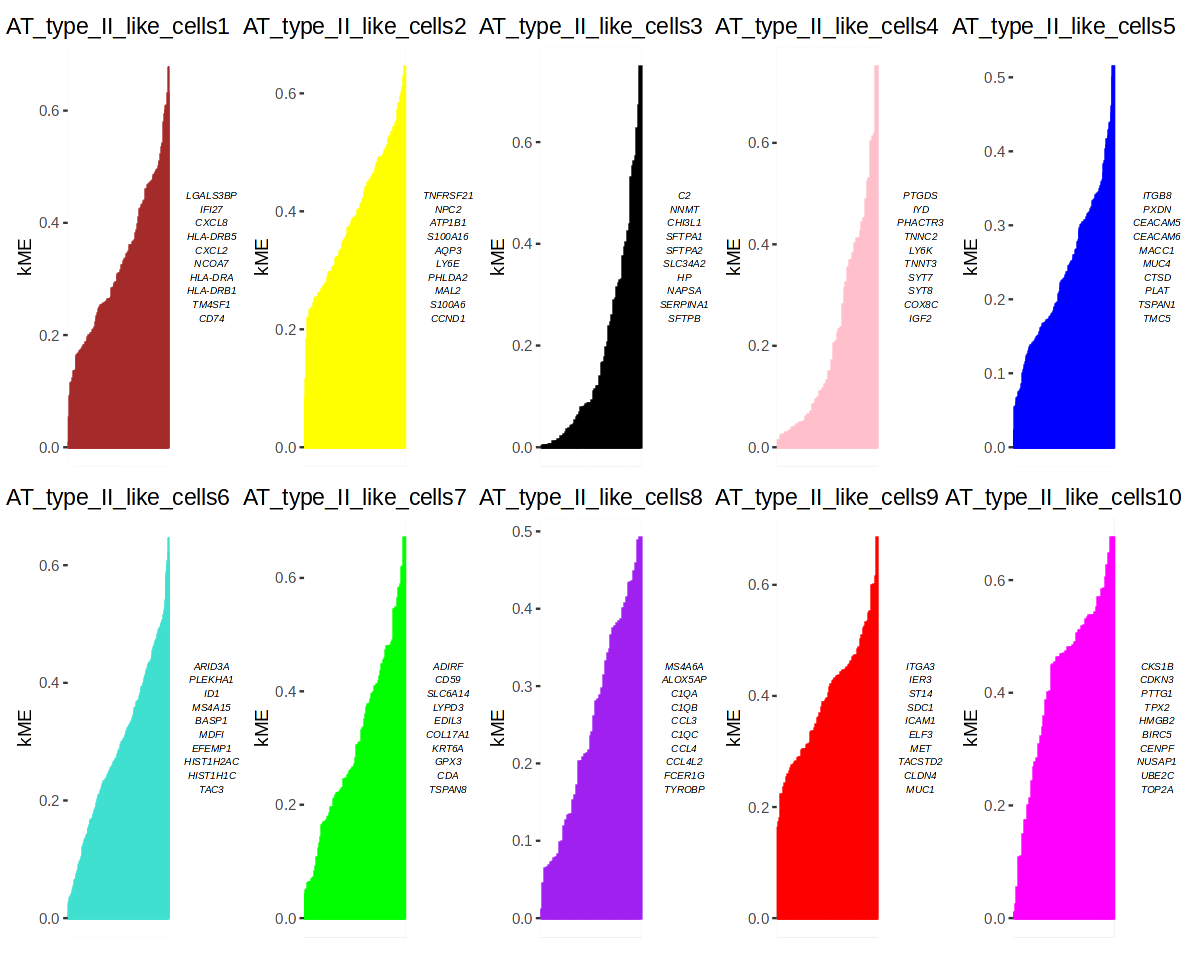

In [48]:
# Harmonized module eigengenes
hMEs <- GetMEs(pbmc_lung)

# Module eigengenes
MEs <- GetMEs(pbmc_lung, harmonized=FALSE)

# Computing connectivity in a module
pbmc_lung <- ModuleConnectivity(pbmc_lung, group.by = "cell_type", group_name = "AT type II like cells")

# Rename the computed module
pbmc_lung <- ResetModuleNames(pbmc_lung, new_name = "AT_type_II_like_cells")

# Plot the connectivity
PlotKMEs(pbmc_lung, ncol=5)

In [49]:
modules <- GetModules(pbmc_lung) %>% subset(module != 'grey')

In [22]:
# Setting up an expression matrix for only Club cells for having a WGCNA only for this cluster

pbmc_lung <- SetDatExpr(pbmc_lung, group_name = "Club cells", group.by= "cell_type", assay = "RNA_test")

  ..Excluding 218 genes from the calculation due to too many missing samples or zero variance.


In [23]:
# Test different soft powers to obtain the sacle free topology thershold

pbmc_lung <- TestSoftPowers(pbmc_lung, networkType = 'signed')
plot_list <- PlotSoftPowers(pbmc_lung)

pickSoftThreshold: will use block size 1671.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 1671 of 1671
   Power SFT.R.sq  slope truncated.R.sq  mean.k. median.k. max.k.
1      1   0.3880 44.000         0.2670 858.0000  8.57e+02 933.00
2      2   0.3440 21.600         0.2260 446.0000  4.43e+02 529.00
3      3   0.4020  6.600         0.6690 235.0000  2.31e+02 308.00
4      4   0.2020  3.030         0.8420 125.0000  1.22e+02 187.00
5      5   0.0215  0.751         0.9320  67.7000  6.46e+01 121.00
6      6   0.1790 -1.730         0.7130  37.3000  3.47e+01  82.00
7      7   0.7550 -3.250         0.8770  20.9000  1.88e+01  57.70
8      8   0.9180 -3.240         0.9630  12.0000  1.03e+01  42.00
9      9   0.9450 -3.080         0.9720   7.0600  5.67e+00  31.60
10    10   0.9600 -2.800         0.9770   4.2700  3.19e+00  24.40
11    12   0.9460 -2.390         0.9620   1.7200  1.04e+00  15.60
12    14   0.9140 -2.070         0.9180   0.7940  3.6

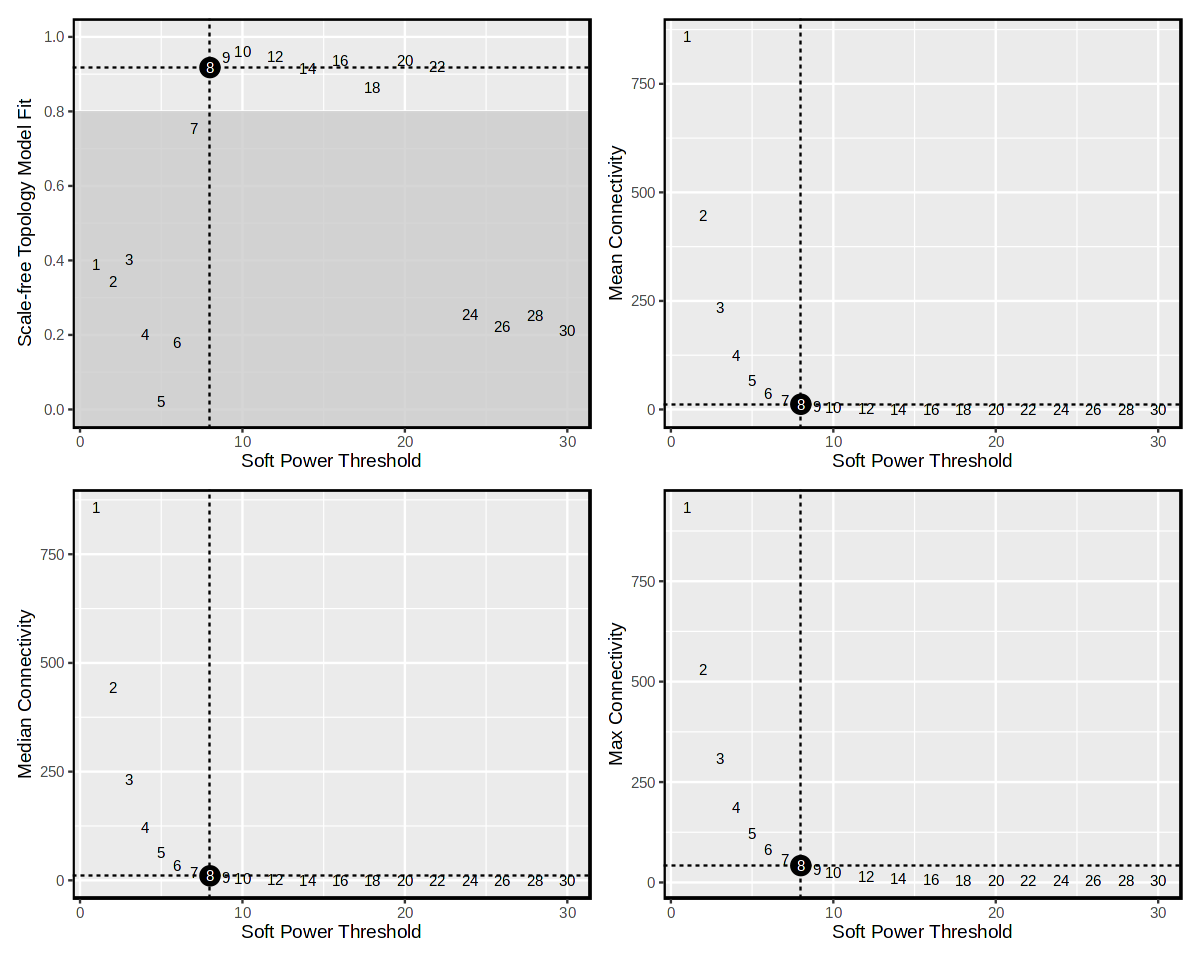

In [24]:
# Using patchworker the plot the results

options(repr.plot.width=10, repr.plot.height=8) # adjusting the plot size

wrap_plots(plot_list, ncol=2)

Soft power not provided. Automatically using the lowest power that meets 0.8 scale-free topology fit. Using soft_power = 8
 Calculating consensus modules and module eigengenes block-wise from all genes
 Calculating topological overlaps block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
 ..Working on block 1 .
 ..Working on block 1 .
 ..merging consensus modules that are too close..


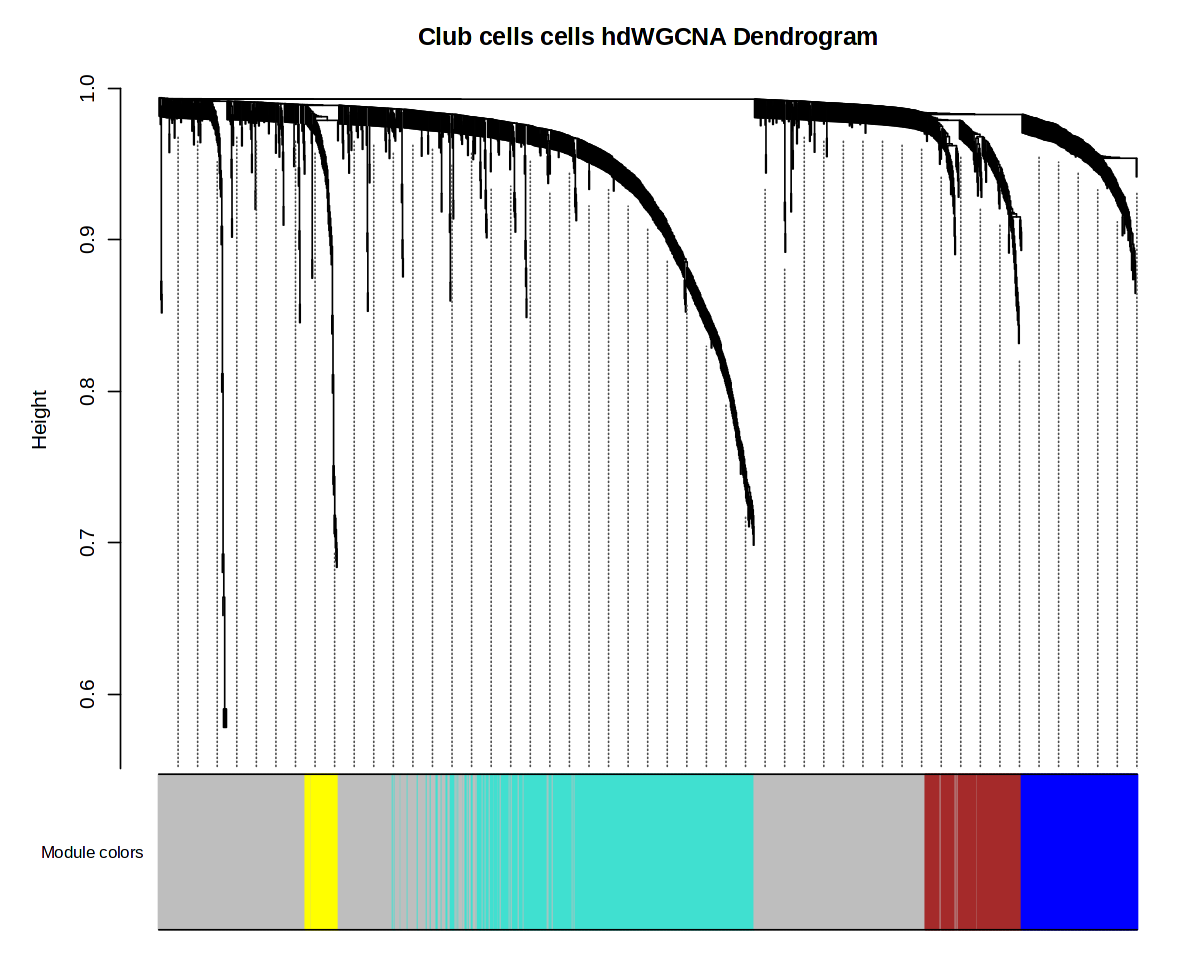

In [26]:
# Creating the dendrogram for club cells

pbmc_lung <- ConstructNetwork(pbmc_lung, tom_name = "Club cells", overwrite_tom = FALSE)
PlotDendrogram(pbmc_lung, main="Club cells cells hdWGCNA Dendrogram")

In [27]:
# Getting the topology overlapping Matrix (already loaded on disk)

TOM <- GetTOM(pbmc_lung)

In [28]:
suppressMessages(

pbmc_lung <- ModuleEigengenes(pbmc_lung, group.by.vars= "cell_type")
    
)

[1] "grey"
[1] "turquoise"
[1] "yellow"


Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”


[1] "brown"
[1] "blue"


[1] "Club cells1"
[1] "Club cells2"
[1] "Club cells3"
[1] "Club cells4"
[1] "Club cells1"
[1] "Club cells2"
[1] "Club cells3"
[1] "Club cells4"


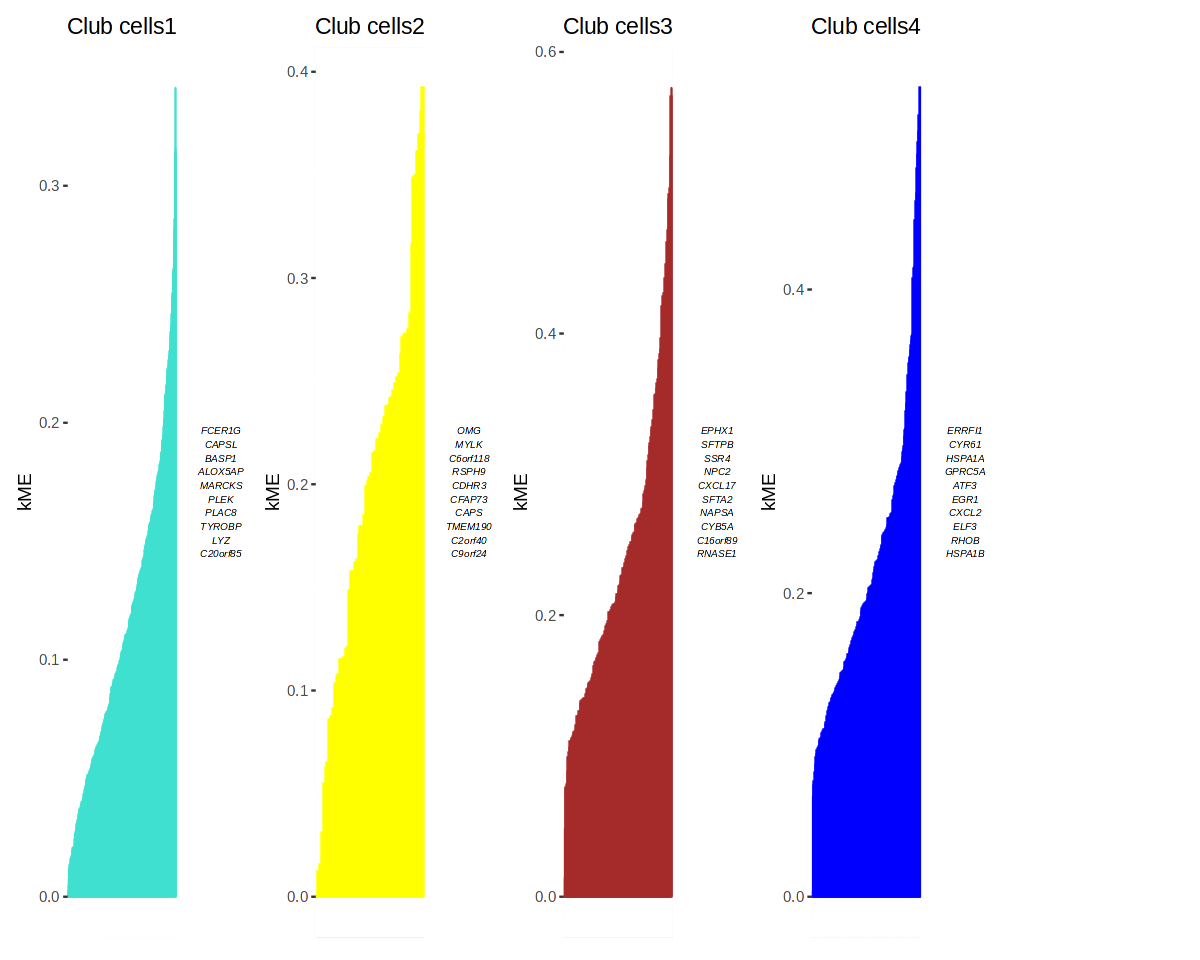

In [30]:
# Harmonized module eigengenes
hMEs <- GetMEs(pbmc_lung)

# Module eigengenes
MEs <- GetMEs(pbmc_lung, harmonized=FALSE)

# Computing connectivity in a module
pbmc_lung <- ModuleConnectivity(pbmc_lung, group.by = "cell_type", group_name = "Club cells")

# Rename the computed module
pbmc_lung <- ResetModuleNames(pbmc_lung, new_name = "Club cells")

# Plot the connectivity
PlotKMEs(pbmc_lung, ncol=5)